# Part 1. EDA & Visualization
## Load Data

In [10]:
import pandas as pd
import os
frame_n = 0

video = 'chega-be'
data = pd.read_pickle(os.path.join('processed', video + '.pkl'))
frame_id = data.iloc[frame_n]['filename']


## Explore Extracted Data in one Frame

### Print first lines

In [11]:
# Print first lines
data.head() 

,filename,detections,poses,faces,text,embedding,fer
0,img00116.jpeg,"[[192, 39, 710, 611, person, 0.85546875], [106...","[[[0.5287994146347046, 0.38902580738067627, -0...","[[[0.5354748964309692, 0.4468356966972351, -0....","[=3, {2624, MRRAAA, O1:OI, OO:OO, vANPB)A]","[1, 253, 255, 1, 1, 255, 1, 1, 0, 10, 253, 8, ...","[{'location': [463, 750, 117, 404], 'embedding..."
1,img01657.jpeg,"[[360, 16, 782, 686, person, 0.91015625], [105...","[[[0.5852636694908142, 0.3498694896697998, -0....","[[[0.5782243013381958, 0.41002634167671204, -0...","[MRRAGA, 13.39, 13.50, vANPBRA, /, 2024]","[253, 2, 253, 0, 254, 254, 3, 253, 255, 8, 0, ...","[{'location': [597, 899, 90, 393], 'embedding'..."
2,img00589.jpeg,"[[669, 16, 610, 686, person, 0.93359375], [26,...","[[[0.274549663066864, 0.38907337188720703, -0....","[[[0.27605170011520386, 0.4545535743236542, -0...","[=3, 1, MORRAGA, 03.54, 04834, vANPBRA, 2824]","[253, 2, 2, 0, 254, 253, 2, 254, 3, 6, 0, 6, 5...","[{'location': [160, 444, 127, 411], 'embedding..."
3,img00264.jpeg,"[[631, 38, 633, 673, person, 0.94140625], [9, ...","[[[0.28526628017425537, 0.4065382480621338, -0...","[[[0.26723700761795044, 0.4672597646713257, -0...","[23, 82524, MORRAGA, 01.46, 01.21, vANPBRA]","[253, 2, 0, 6, 254, 254, 0, 254, 6, 9, 0, 4, 0...","[{'location': [194, 472, 135, 414], 'embedding..."
4,img00070.jpeg,"[[202, 33, 726, 610, person, 0.87890625], [107...","[[[0.5045007467269897, 0.4107182025909424, -0....","[[[0.5132942199707031, 0.46098387241363525, -0...","[=3, 82624, MPRRIAGA, 00.25, OO:OO, vANPBRA]","[1, 253, 255, 4, 0, 254, 3, 1, 1, 14, 253, 6, ...","[{'location': [434, 724, 131, 421], 'embedding..."


### Explore Structure
What info is within the data

In [12]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2204 entries, 0 to 2203
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   filename    2204 non-null   object
 1   detections  2204 non-null   object
 2   poses       2204 non-null   object
 3   faces       2204 non-null   object
 4   text        2204 non-null   object
 5   embedding   2204 non-null   object
 6   fer         2204 non-null   object
dtypes: object(7)
memory usage: 120.7+ KB
None


### Load information from one of the frames

In [13]:
data.iloc[frame_n]

filename                                          img00116.jpeg
detections    [[192, 39, 710, 611, person, 0.85546875], [106...
poses         [[[0.5287994146347046, 0.38902580738067627, -0...
faces         [[[0.5354748964309692, 0.4468356966972351, -0....
text                 [=3, {2624, MRRAAA, O1:OI, OO:OO, vANPB)A]
embedding     [1, 253, 255, 1, 1, 255, 1, 1, 0, 10, 253, 8, ...
fer           [{'location': [463, 750, 117, 404], 'embedding...
Name: 0, dtype: object

### Detection of objects and confidence level

In [14]:
object_count = 0
for objects in data.iloc[frame_n]['detections']:
    object_count += 1
    print(f"Object {object_count}: {objects[4]} - Confidence: {objects[5]}")

Object 1: person - Confidence: 0.85546875
Object 2: person - Confidence: 0.73828125


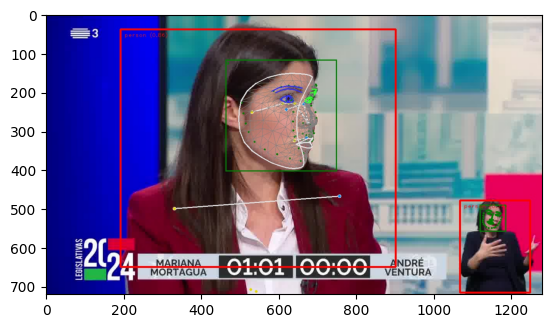

In [15]:
from PIL import Image
import matplotlib.pyplot as plt

img = Image.open(os.path.join('videos', video, data.iloc[frame_n]['filename']))
pimg = Image.open(os.path.join('processed', video, frame_id))
plt.imshow(pimg)
plt.show()

### Detection of emotions and confidence level

In [16]:
n = 0
for face in data.iloc[frame_n]['fer']:
    n += 1
    print(f" Emotion {n}: {face['emotion']}")

 Emotion 1: Neutral
 Emotion 2: Fear


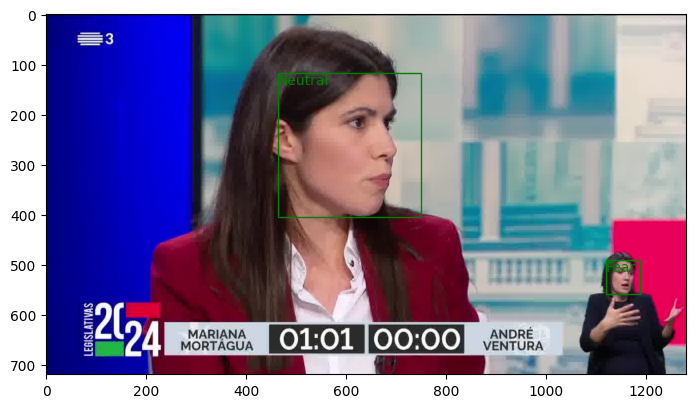

In [17]:
import matplotlib.patches as patches

# Facial emotion recognition
idx_to_class={0: 'Anger', 1: 'Contempt', 2: 'Disgust', 3: 'Fear', 4: 'Happiness', 5: 'Neutral', 6: 'Sadness', 7: 'Surprise'}

fig = plt.figure()
ax = fig.add_axes([0, 0, 1, 1])
ax.imshow(img)

width, height = img.size
for fer in data.iloc[frame_n]['fer']:
    
    x = fer['location'][0]
    y = fer['location'][2]
    width = fer['location'][1] - fer['location'][0]
    height = fer['location'][3] - fer['location'][2]

    # Create a rectangle patch
    rect = patches.Rectangle((x, y), width, height, linewidth=1, edgecolor='g', facecolor='none')

    # Add patch to the image
    ax.add_patch(rect)

    ax.text(x, y, fer['emotion'],
            verticalalignment='top',
            color='g')

plt.show()

### Build Histograms

#### Objects

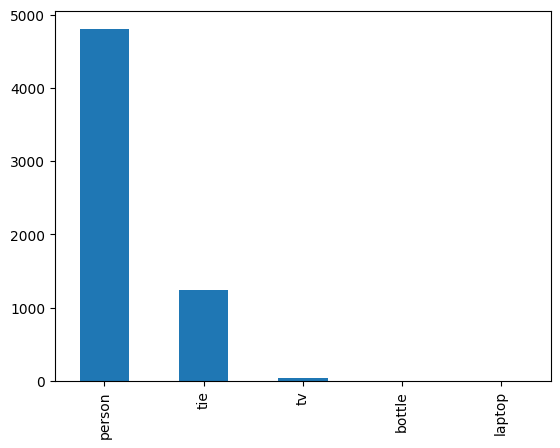

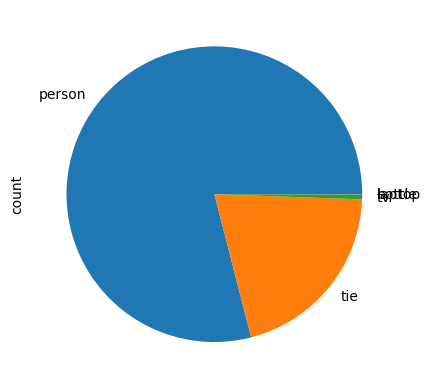

In [18]:
objects = []
for frame_number in range(len(data)):
    for object in data.iloc[frame_number]['detections']:
        objects.append(object[4])

objects = pd.Series(objects)
objects.value_counts().plot(kind='bar')
plt.show()

# pie chart
objects.value_counts().plot(kind='pie')
plt.show()

##### Confidence level of the objects

        confidence
object            
bottle    0.500000
laptop    0.636719
person    0.850398
tie       0.649662
tv        0.565430


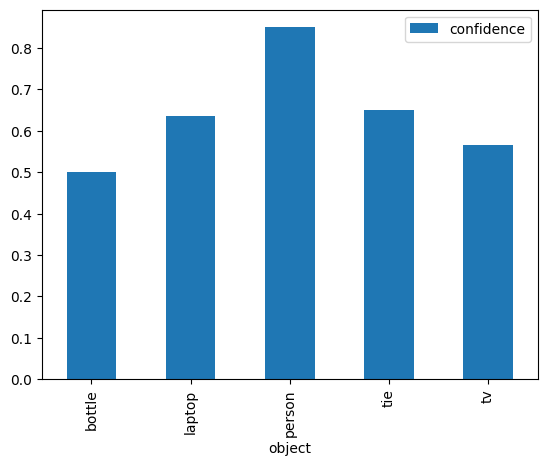

In [22]:
# calculate average of the confidence of each object
objects = []
# save the confidence of each object with a struct for each object
confidence_per_object = {}
object_confidence = 0

for frame_m in range(len(data)):
    for object in data.iloc[frame_m]['detections']:
        objects.append(object[4])
        object_confidence = object[5]
        if object[4] not in confidence_per_object:
            confidence_per_object[object[4]] = []
        confidence_per_object[object[4]].append(object[5])

average_confidence = pd.DataFrame({'object': objects, 'confidence': confidence}).groupby('object').mean()
average_confidence.plot(kind='bar')
print(average_confidence)
plt.show()

#### Emotions

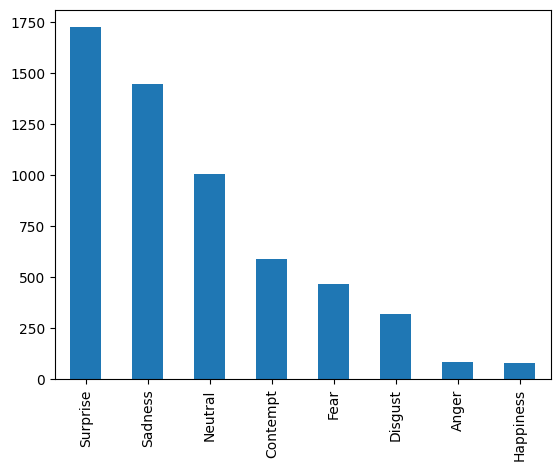

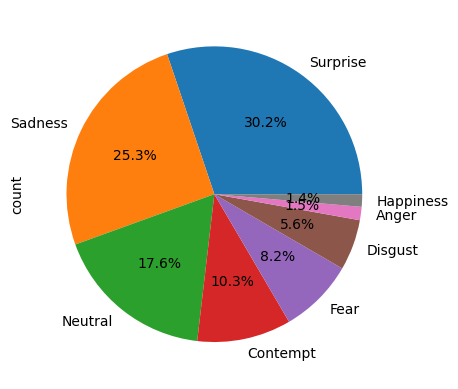

In [20]:
#Emotion histogram
emotions = []
for frame_number in range(len(data)):
    for face in data.iloc[frame_number]['fer']:
        emotions.append(face['emotion'])

emotions = pd.Series(emotions)
emotions.value_counts().plot(kind='bar')

plt.show()
emotions.value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.show()
